# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date 
import csv

# Import API key (Please put your own openweathermap in the api_keys.py file)
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
# This url "link + individual api_key + &q=" is our link to perform request to openweathermap 
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Alexis the tutor gave me guidance how to pull the City and Cloudiness while i finish up the rest of the assignment
# I also learn a great way to perfrom api request and store it into a big list made of dictionaries

# Create empty list to store all of our data from the web 
city_weather = []
record = 0 
set_1 = 1

for city in cities:
    city_read = url + city
    record += 1 
    print("Processing Record " + str(record) + " of Set " + str(set_1) + " | " + city)
    try:
        data_requested = requests.get(city_read).json()
        city_weather.append({"City" : city,
                            "Cloudiness" : data_requested["clouds"]["all"],
                            "Country" : data_requested["sys"]["country"],
                            "Date" : data_requested["dt"],
                            "Humidity" : data_requested["main"]["humidity"],
                            "Lat": data_requested["coord"]["lat"],
                            "Lng": data_requested["coord"]["lon"],
                            "Max Temp" : data_requested["main"]["temp_max"],
                            "Wind Speed" : data_requested["wind"]["speed"]})
        if (record >= 50):
            record = 0
            set_1 += 1
        
    except:
        print("City not found. Skipping...")
        pass
print("--------------------------------\nData Retrieval Complete\n--------------------------------")

Processing Record 1 of Set 1 | sechura
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | luanda
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | roura
Processing Record 13 of Set 1 | mackay
Processing Record 14 of Set 1 | byron bay
Processing Record 15 of Set 1 | xai-xai
Processing Record 16 of Set 1 | senekal
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | maxixe
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | gazanjyk
Processing Record 23 of Set 1 | nikolskoye
Processing Record 24 of Set 1 | saint-philippe
Processing Record 25 of Set 1 | gi

Processing Record 36 of Set 4 | faanui
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | talcahuano
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | dubbo
Processing Record 44 of Set 4 | batangafo
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | montrose
Processing Record 47 of Set 4 | maragogi
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | stephenville
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | rovaniemi
Processing Record 4 of Set 5 | nairn
Processing Record 5 of Set 5 | ouro preto do oeste
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | beloha
Processing Record

Processing Record 23 of Set 8 | bosconia
Processing Record 24 of Set 8 | cabo san lucas
Processing Record 25 of Set 8 | diffa
Processing Record 26 of Set 8 | navrongo
Processing Record 27 of Set 8 | alzamay
Processing Record 28 of Set 8 | barbar
City not found. Skipping...
Processing Record 29 of Set 8 | kurchum
Processing Record 30 of Set 8 | saint-francois
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | grimari
City not found. Skipping...
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | calbuco
Processing Record 35 of Set 8 | shubarshi
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | vardo
Processing Record 38 of Set 8 | lichinga
Processing Record 39 of Set 8 | moranbah
Processing Record 40 of Set 8 | jablah
Processing Record 41 of Set 8 | santa isabel
Processing Record 42 of Set 8 | port-gentil
Processing Record 43 of Set 8 | rognan
Processing Record 44 of Set 8 | pochutla
Processing Record 45 of Set 8 |

Processing Record 7 of Set 12 | lolua
City not found. Skipping...
Processing Record 8 of Set 12 | avera
Processing Record 9 of Set 12 | naze
Processing Record 10 of Set 12 | shache
Processing Record 11 of Set 12 | vao
Processing Record 12 of Set 12 | baciu
Processing Record 13 of Set 12 | boisoara
Processing Record 14 of Set 12 | derzhavinsk
Processing Record 15 of Set 12 | yibin
Processing Record 16 of Set 12 | vestmanna
Processing Record 17 of Set 12 | berlevag
Processing Record 18 of Set 12 | cabedelo
Processing Record 19 of Set 12 | huty
Processing Record 20 of Set 12 | copiapo
Processing Record 21 of Set 12 | tevaitoa
Processing Record 22 of Set 12 | kungurtug
Processing Record 23 of Set 12 | tongren
Processing Record 24 of Set 12 | kupang
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | vallenar
Processing Record 27 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 28 of Set 12 | kangly
Processing Record 29 of Set 12 | vila velha
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# use .count() function to find how many rows we found in our api calls 
weather_dataframe = pd.DataFrame(city_weather)
weather_dataframe.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [6]:
# Export the data into a .csv files 
weather_dataframe.to_csv(output_data_file)

In [7]:
weather_dataframe = pd.DataFrame(city_weather)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sechura,64,PE,1578449155,85,-5.56,-80.82,295.21,4.83
1,cidreira,0,BR,1578449175,71,-30.17,-50.22,296.81,4.15
2,chuy,0,UY,1578448971,62,-33.69,-53.46,291.44,3.77
3,bredasdorp,0,ZA,1578449159,94,-34.53,20.04,293.15,1.50
4,banda aceh,57,ID,1578449732,63,5.56,95.32,301.21,3.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

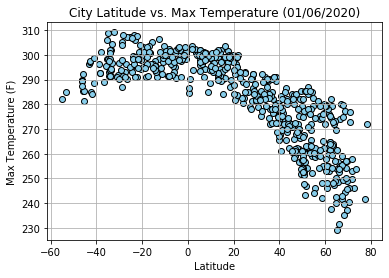

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/06/2020)")
plt.grid (b=True)
plt.savefig("savefig/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

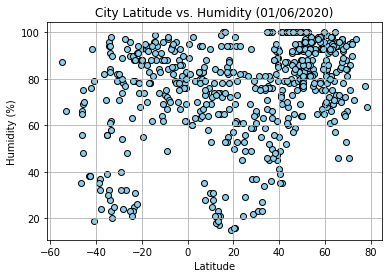

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (01/06/2020)")
plt.grid (b=True)
plt.savefig("savefig/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

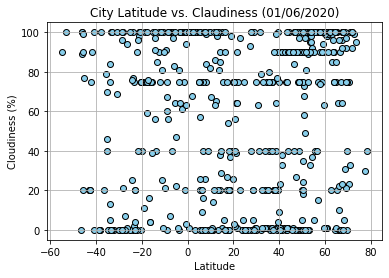

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Claudiness (01/06/2020)")
plt.grid(b=True)
plt.savefig("savefig/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

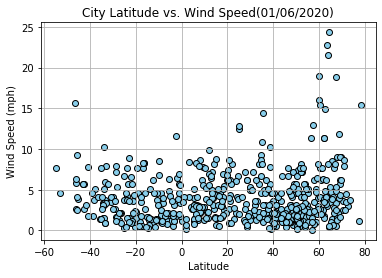

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed(01/06/2020)")
plt.grid(b=True)
plt.savefig("savefig/lat_vs_windspeed.png")
plt.show()